# Chapter: Machine learning

## Introducing scikit-learn

### Data representation in scikit-learn

#### Data as a table

In [32]:
import seaborn as sns

iris = sns.load_dataset("iris")
iris.head

<bound method NDFrame.head of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

/root/mambaforge/envs/pyds_workbook/lib/python3.9/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


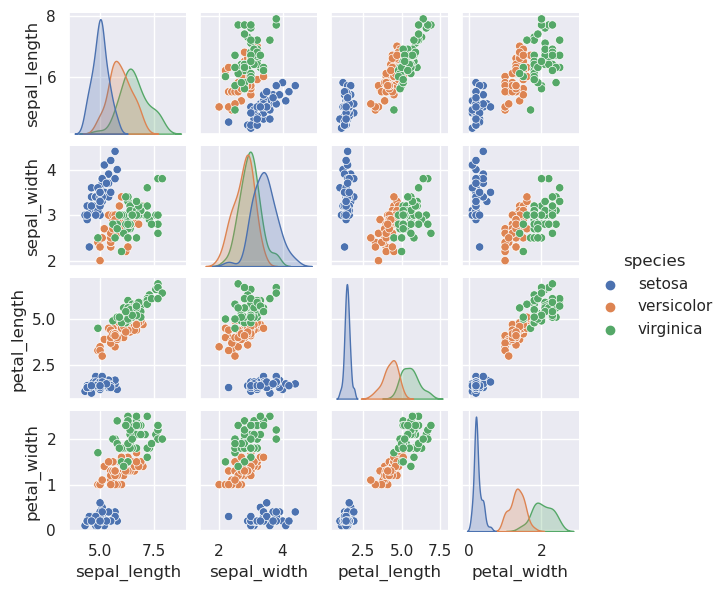

In [33]:
%matplotlib inline
import seaborn as sns

sns.set()
sns.pairplot(iris, hue="species", size=1.5);

- extract the features matrix and target array from the DataFrame
- use via Pandas DataFrame operations

In [34]:
x_iris = iris.drop("species", axis=1)
x_iris.shape

(150, 4)

In [35]:
y_iris = iris["species"]
y_iris.shape

(150,)

### Basics of the API
Most commonly, the steps in using the Scikit-Learn estimator API are as follows (we will step through a handful of detailed examples in the sections that follow).

- Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
- Choose model hyperparameters by instantiating this class with desired values.
- Arrange data into a features matrix and target vector following the discussion above.
- Fit the model to your data by calling the fit() method of the model instance.
- Apply the Model to new data:
    - For supervised learning, often we predict labels for unknown data using the predict() method.
    - For unsupervised learning, we often transform or infer properties of the data using the transform() or predict() method.

We will now step through several simple examples of applying supervised and unsupervised learning methods.#

### Supervised learning example: Simple linear regression

As an example of this process, let's consider a simple linear regression—that is, the common case of fitting a line to $(x, y)$ data. We will use the following simple data for our regression example:

In [36]:
import matplotlib.pyplot as plt
import numpy as np

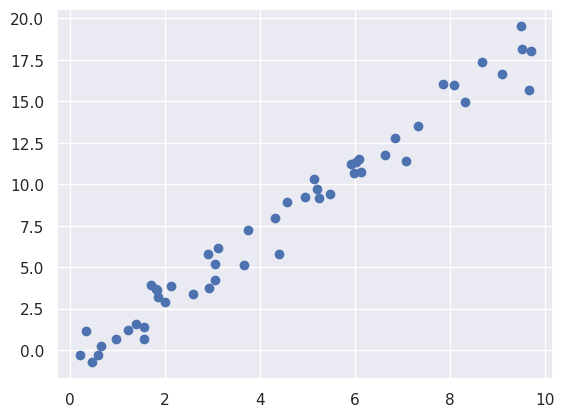

In [37]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

**1. Choose a model class**

In [38]:
from sklearn.linear_model import LinearRegression

**2. Choose model hyperparameters**

- The class of model is not the same as the instance of a model
- Once decided on model class:

    - do we fit for the offset? (y-intercept)?
    - would we like the model normalised?
    - would we pre-process our features to add model flexibility?
    - what degree of regularisation would we like to use in our model?
    - how many model components would we like to use?

In [39]:
# using the LinearRegression class, specify you would like to fit the intecept with [fit_intercept] hyperparameter

model = LinearRegression(fit_intercept=True)
model

LinearRegression()

3. Arrange data into a features matric and target vector
- 2D feature matrix and a 1D target array
- y in length n_samples array
- Modify data x to make it a matrix of size, [n_samples, n_features]

In [40]:
# Simple reshaping of 1D array

X = x[:, np.newaxis]
X.shape

(50, 1)

**Supervised learning example: Simple linear regression**

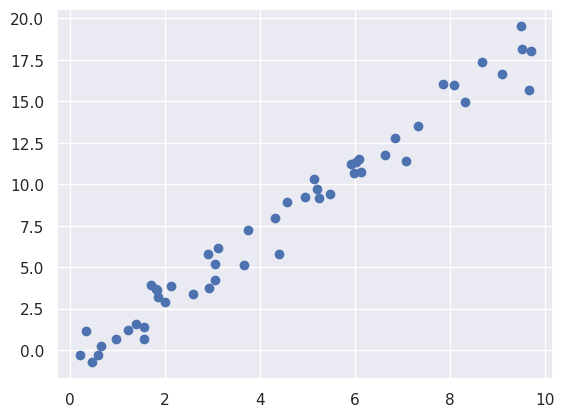

In [41]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

1. Choose a class of model
- each model is represented by a python class

In [42]:
# import the linear regression class, note other general linear regression models exist
from sklearn.linear_model import LinearRegression

2. Choose model hyperparameters
- Note: Class of model is not the same as an instance of a model
    - Would we like to fit for the offset (i.e., y-intercept)?
    - Would we like the model to be normalized?
    - Would we like to preprocess our features to add model flexibility?
    - What degree of regularization would we like to use in our model?
    - How many model components would we like to use?

In [43]:
# use fit_intercept as a hyperparameter

model = LinearRegression(fit_intercept=True)
model

LinearRegression()

3. Arrange data into a features matrix and target vector¶
- reshape feature matrix

In [44]:
X = x[:, np.newaxis]
X.shape

(50, 1)

4. Fit the model to your data
- Now it is time to apply our model to data. This can be done with the fit() method of the model:

In [45]:
model.fit(X,y)

LinearRegression()

fit() command leads to model-dependent internal computations to take place, and results stored in model-specific attributes that the user can explore. In Scikit-learn, all model parameters that were learned in the fit() process have trailing underscores, eg:

In [46]:
model.coef_

array([1.9776566])

In [47]:
model.intercept_

-0.9033107255311146

These two parameters represent the slope and intercept of the simple linear fit to the data. Comparing to the data definition, we see that they are very close to the input slope of 2 and intercept of -1.

5. Predict labels for unknown data

Once the model is trained, the task of supervised ML is to evaluate it based on its predictions on data that isnt in the training dataset. In Sci-kit learn, can be done using predict(). 

For the sake of this example, our "new data" will be a grid of x values, and we will ask what y values the model predicts:

In [48]:
xfit = np.linspace(-1, 11)

In [49]:
xfit

array([-1.        , -0.75510204, -0.51020408, -0.26530612, -0.02040816,
        0.2244898 ,  0.46938776,  0.71428571,  0.95918367,  1.20408163,
        1.44897959,  1.69387755,  1.93877551,  2.18367347,  2.42857143,
        2.67346939,  2.91836735,  3.16326531,  3.40816327,  3.65306122,
        3.89795918,  4.14285714,  4.3877551 ,  4.63265306,  4.87755102,
        5.12244898,  5.36734694,  5.6122449 ,  5.85714286,  6.10204082,
        6.34693878,  6.59183673,  6.83673469,  7.08163265,  7.32653061,
        7.57142857,  7.81632653,  8.06122449,  8.30612245,  8.55102041,
        8.79591837,  9.04081633,  9.28571429,  9.53061224,  9.7755102 ,
       10.02040816, 10.26530612, 10.51020408, 10.75510204, 11.        ])

As before, we need to coerce these x values into a [n_samples, n_features] features matrix, after which we can feed it to the model:

In [50]:
Xfit = xfit[:, np.newaxis]

In [51]:
Xfit

array([[-1.        ],
       [-0.75510204],
       [-0.51020408],
       [-0.26530612],
       [-0.02040816],
       [ 0.2244898 ],
       [ 0.46938776],
       [ 0.71428571],
       [ 0.95918367],
       [ 1.20408163],
       [ 1.44897959],
       [ 1.69387755],
       [ 1.93877551],
       [ 2.18367347],
       [ 2.42857143],
       [ 2.67346939],
       [ 2.91836735],
       [ 3.16326531],
       [ 3.40816327],
       [ 3.65306122],
       [ 3.89795918],
       [ 4.14285714],
       [ 4.3877551 ],
       [ 4.63265306],
       [ 4.87755102],
       [ 5.12244898],
       [ 5.36734694],
       [ 5.6122449 ],
       [ 5.85714286],
       [ 6.10204082],
       [ 6.34693878],
       [ 6.59183673],
       [ 6.83673469],
       [ 7.08163265],
       [ 7.32653061],
       [ 7.57142857],
       [ 7.81632653],
       [ 8.06122449],
       [ 8.30612245],
       [ 8.55102041],
       [ 8.79591837],
       [ 9.04081633],
       [ 9.28571429],
       [ 9.53061224],
       [ 9.7755102 ],
       [10

In [52]:
yfit = model.predict(Xfit)

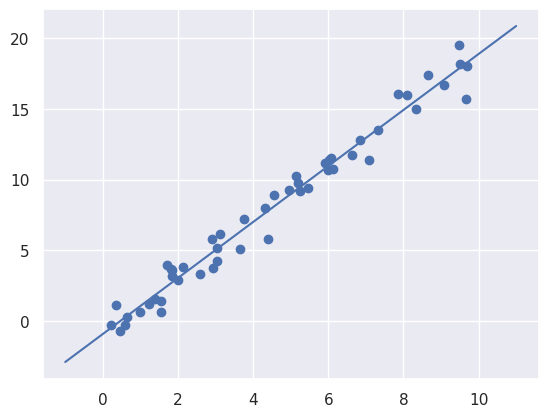

In [53]:
# lets visualise results
plt.scatter(x, y)
plt.plot(xfit, yfit)


Typically the efficacy of the model is evaluated by comparing its results to some known baseline, as we will see in the next example

## Supervised learning example: Iris classification

Question: given a model trained on a portion of the Iris data, how well can we predict the remaining labels?

Model: Guassian naive Bayes
- assume each class is drown from an axis-aligned gaussian distribution
- fast, no hyperparameters, Gaussian naive Bayes is a good model to use as a baseline classification before exploring if improvements c an be found through more sophisticated models

Split dataset:

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
Xtrain, Xtest, ytrain, ytest = train_test_split(x_iris, y_iris,
                                                random_state=1)

In [56]:
# predict the labels

from sklearn.naive_bayes import GaussianNB # import model class
model = GaussianNB() # instantiate model
model.fit(Xtrain, ytrain) # fit model
y_model = model.predict(Xtest) # predict on new data

accuracy_score to see the fraction of predicted labels that match their true value

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

Accuracy 97%

## Unsupervised learning example: Iris dimensionality

Example of unsupervised learning: reduce dimensionality of the iris data

- Iris data is 4D: four features recorded for each sample
- is there a suitable lower dimensional representation that retains essential features of the data?
- eg. PCA - fast linear dimensionality reduction technique, and ask the model to return 2 components (eg 2D reoresentation of dataset)

In [60]:
from sklearn.decomposition import PCA # choose model 
model = PCA(n_components=2) # instantiate the model with hyperparameters
model.fit(x_iris) # fit to data. Notice y not specified
X_2D = model.transform(x_iris) #transform the data to 2 dimensions

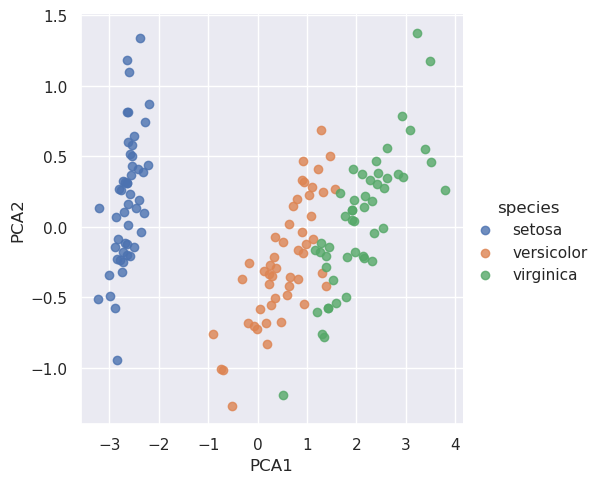

In [67]:
#Plot results

iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot(x = "PCA1", y = "PCA2", hue='species', data=iris, fit_reg=False);

## Unsupervised learning: Iris clustering

- Apply clustering to the iris data
- clustering algorithm attempts to find distinct groups of data without reference to any labels
- model: Gaussian mixture model (GMM)

In [71]:
from sklearn.mixture import GaussianMixture # Choose the model

model = GaussianMixture(n_components=3, covariance_type = 'full') # add hyperparameters
model.fit(x_iris) # fit model
y_gm = model.predict(x_iris) # determine clusters

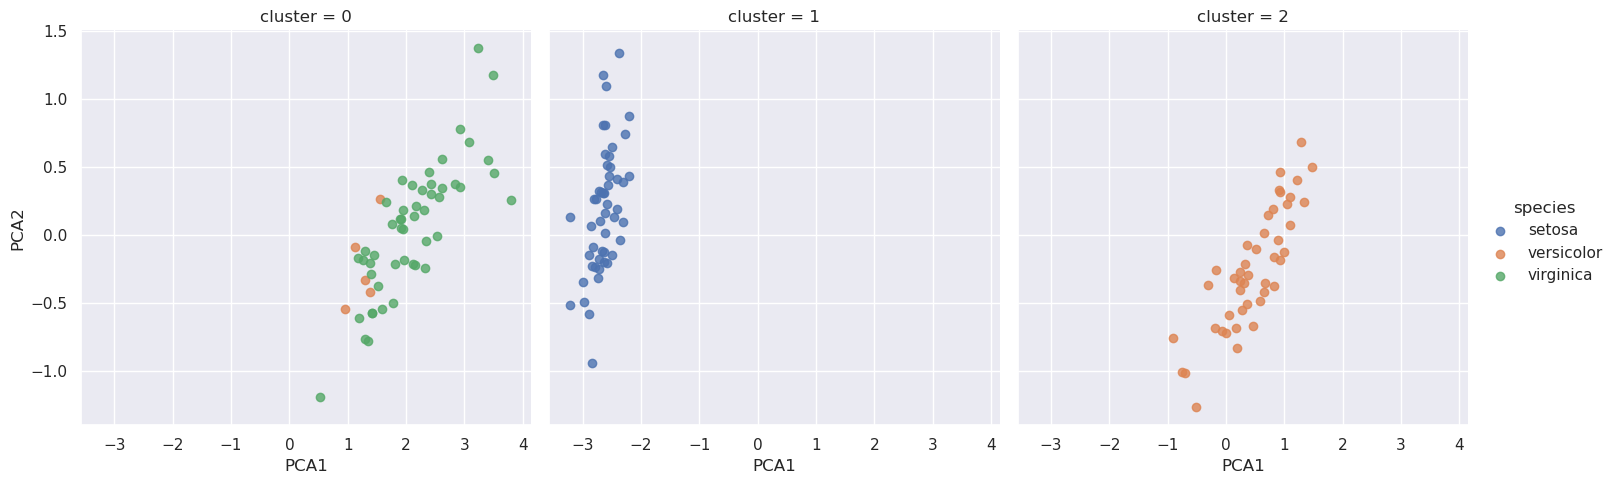

In [72]:
# add cluster label to the iris dataframe
iris['cluster'] = y_gm

sns.lmplot(x="PCA1", y="PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);

By splitting the data by cluster number, we see exactly how well the GMM algorithm has recovered the underlying label: the setosa species is separated perfectly within cluster 0, while there remains a small amount of mixing between versicolor and virginica. This means that even without an expert to tell us the species labels of the individual flowers, the measurements of these flowers are distinct enough that we could automatically identify the presence of these different groups of species with a simple clustering algorithm! This sort of algorithm might further give experts in the field clues as to the relationship between the samples they are observing.

## Application: Exploring Hand-written Digits

### Load and visualise digit data from scikit-learn

In [75]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

A 3D array: 1,797 samples each with a 8 x 8 grid of pixels
- visualise the first 100

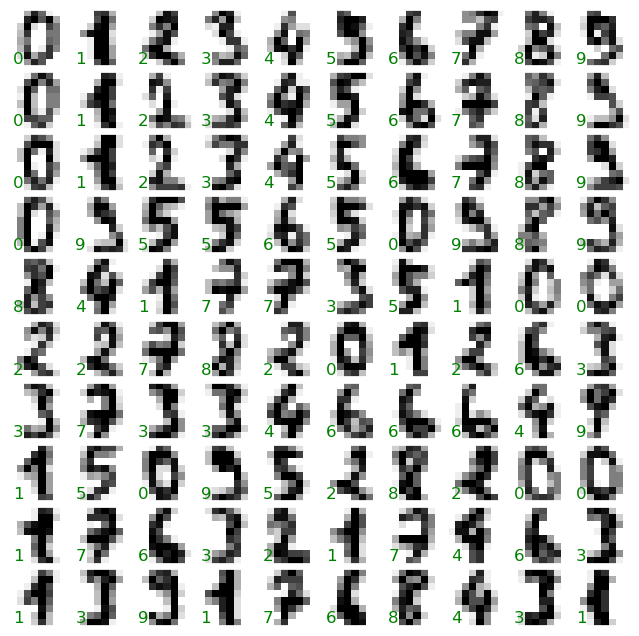

In [77]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap = 'binary', interpolation = 'nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform = ax.transAxes, color = 'green')

To work with this data in scikit-learn, we need a 2d [n_samples, n_features] representation. 

- treat each pixel in the image as a feature: flatten out the pixel arrays so we have a length-64 array of pixel values representing each digit

- need target array which has the label for each digit

- the two quantities are built into the digit dataset under the data and target attributes

In [78]:
X = digits.data
X.shape

(1797, 64)

In [79]:
y = digits.target
y.shape

(1797,)

We see here that there are 1,797 samples and 64 features

### Unsupervised learning: Dimensionality reduction

- visualise the points in the 64 dimensional parameter space
- reduce to 2 dimensions using unsupervised method
- use manifold learning algorithm: Isomap

In [80]:
from sklearn.manifold import Isomap
iso = Isomap(n_components = 2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

/root/mambaforge/envs/pyds_workbook/lib/python3.9/site-packages/sklearn/manifold/_isomap.py:352: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/root/mambaforge/envs/pyds_workbook/lib/python3.9/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

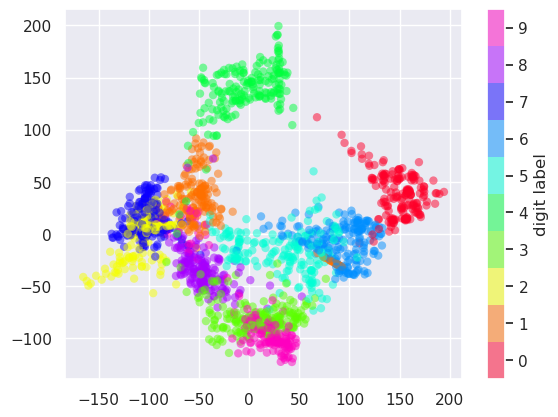

In [84]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('gist_rainbow', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

- 0 and 1 have very little overlap
- more continuous spectrum with 1 and 4, similarity in shapes

## Classification on digits

In [85]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [86]:
from sklearn.naive_bayes import GaussianNB

In [87]:
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [88]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

- 80% accuracy with this model
- Use a confusion matrix to see where we are going wrong

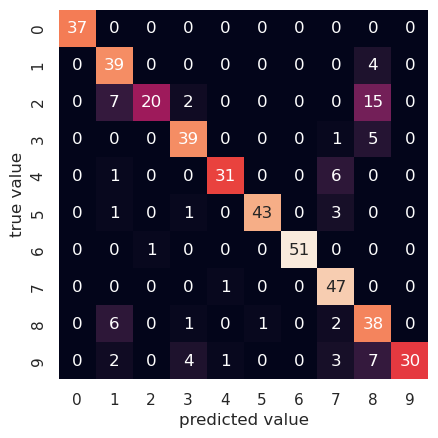

In [89]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

- showing us where mislabelled points tend to be:
    - Lots of 2s are mis-classified as 1 or 8
- re-plot but green for correct, and red for incorrect labels

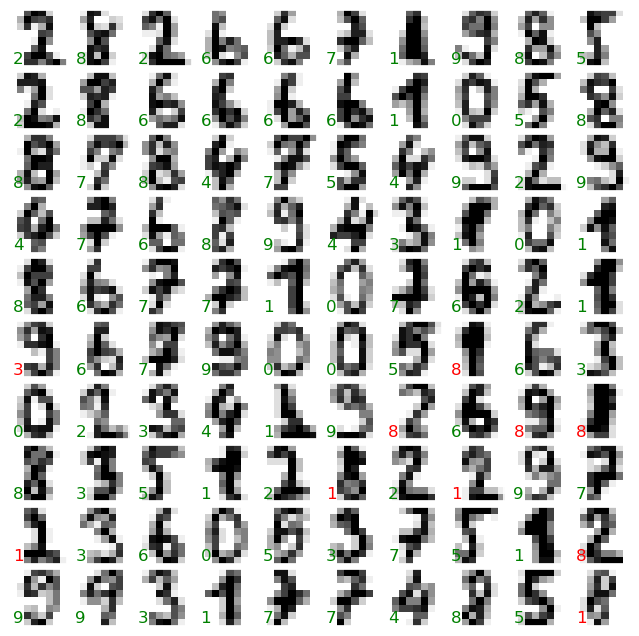

In [90]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')